In [30]:


library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)
library(viridis)

## Import clock, tuberization, photoperiod control genes

In [2]:
CG <- import(file = '../Tables/TableS1_CPT_ATL_DM.csv', 
                   sep =',', header = TRUE, fill = TRUE )

## Import ATL SD/LD Leaf Tuber expression data

In [3]:
#:::::::::::::::::::::::::::::::::::::
SDLD <- import(file = 
('../ATL_diel_norm_tables_rlog/Results/ATL_diel_norm_avsd_expressed.csv'), 
                   sep =',', header = TRUE, fill = TRUE )

## Get CTP gene expression 

In [4]:
CG_ex <- SDLD %>% filter(target_id %in% CG$target_id) %>% left_join(CG %>% select(Group, Gene_Name, 
                                                                                         Genome, target_id,
                                                                                        Gene, Gene_manual), by = 'target_id')

In [5]:
CG_ex[1:2,]

,geneID,ZT,Tissue,Condition,mean_expression,std,cv,Average,SD,CV,target_id,Group,Gene_Name,Genome,Gene,Gene_manual
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Soltu.Atl_v3.01_0G007280.1,0,Leaf,LD,5.442988,0.4682651,0.08603088,5.380913,0.2614125,0.06406455,Soltu.Atl_v3.01_0G007280,Clock_Aux,DET1a,ATL_H0,Synt_1088,Synt_1088
2,Soltu.Atl_v3.01_0G007280.1,0,Leaf,SD,5.143092,0.6380301,0.12405575,5.443916,0.3782475,0.07517077,Soltu.Atl_v3.01_0G007280,Clock_Aux,DET1a,ATL_H0,Synt_1088,Synt_1088


# Define plot functions
## ribbon SDLD plot: SDLD_ribbon_plot_multiple

In [6]:
#Defining ribbon SDLD plot 
#::::::::::::::::::::::::::::::::::::


SDLD_ribbon_plot_multiple <- function(df,Gene_Name, columns) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
  ggplot(.,aes(x=ZT,y=mean_expression,col=Condition))+ # this means that all colors below are determined by Condition
   
    geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, 
                color = '#000000')+ 
  geom_line(aes(x=ZT,y=mean_expression,col =Condition, group = Condition))+ #group will separate different genes from the same Condition
  geom_ribbon(aes(ymin=mean_expression-std,ymax=mean_expression+std, fill = Condition, group = Condition),alpha=0.2, linetype = 0)+
  facet_wrap(~target_id, scales = 'free_y', ncol = columns)+
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+

  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Average Expression (rlog)", x="ZT (h)", title = Gene_Name)+
     scale_color_manual(values = c('SD' = '#33539E',     
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     
                                   'LD'='#A5678E'))) 
   
}


##  Multiple genes with all alleles in one plot, z-score normalized, leaf & tuber in SD : SD_z_genes_multiple

In [7]:
#Defining SD plot for multiple traces in one plot USING Z-SCORE
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SD_z_genes_multiple_LT <- function(df, labels, columns) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
    mutate (Tissue = factor(Tissue, levels = c('Tuber', 'Leaf'))) %>% # order of levels determine order of lines on graph
    group_by(Tissue, Gene_Name) %>% 
    mutate(Z_score = (mean_expression - Average)/SD) %>%
    ungroup() %>% 
  ggplot(.,aes(x=ZT,y=Z_score,col=Tissue))+ # this means that all colors below are determined by Tissue

        geom_vline(xintercept = 12, 
                color = '#000000')+ 
  geom_line(aes(x=ZT,y=Z_score,col =Tissue, group = interaction(target_id,Tissue)), size = 1.2)+ #group will separate different genes from the same Abbreviation
 
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE,
        strip.text = element_text(face = "italic"),
       legend.position = "top")+

 scale_y_continuous()+
  scale_x_continuous(breaks=c(0,6,12,18,24))+
  labs(y=expression(paste(italic("z"),"-score", )), x="ZT (h)")+
    
    
  scale_color_manual(values = c('Tuber'='#CCBB44',    #CC6677  #dirty pink: #A5678E
                                   'Leaf' = '#1a346e'))+ #darker blue: #1a346e; lighter blue:'#33539E'
                                 
    scale_fill_manual(values = alpha(c( 'Tuber'='#CCBB44',
                                      'Leaf' = '#1a346e'))) + 
                
    
       facet_wrap(~Gene_Name, scales = 'free_y', ncol = columns, labeller = labeller(Gene_Name = labels))
    
plot_clock
}


## CO1

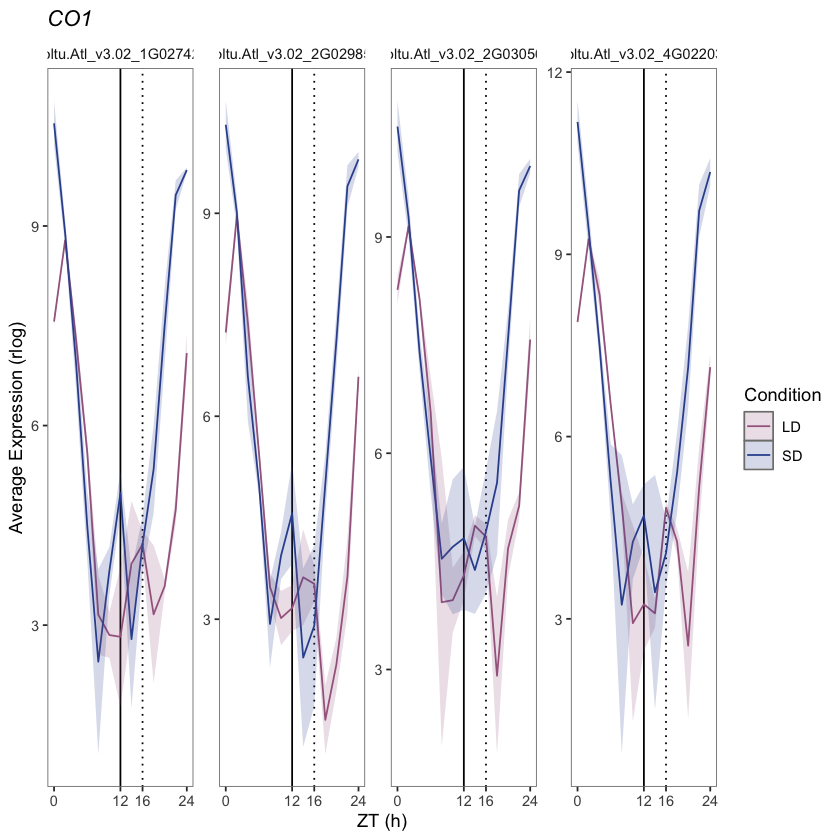

In [8]:
## Plot SD vs LD
CO1_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CO1'|Gene_Name == 'CO1b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO1')),4)
CO1_rlog_ribbonPlot 

In [9]:
CO1_rlog_ribbonPlot %>% save_plot(file="./Results/CO1_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO1 tuber

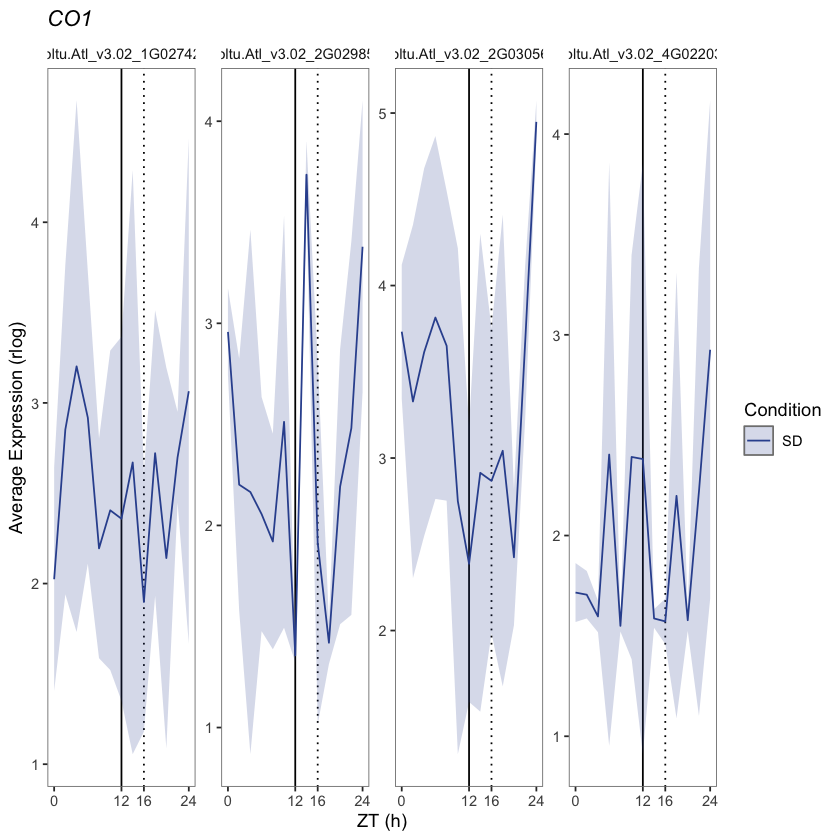

In [10]:
## Plot SD vs LD
CO1_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CO1'|Gene_Name == 'CO1b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO1')),4)
CO1_Tuber_rlog_ribbonPlot 
CO1_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/CO1_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO2

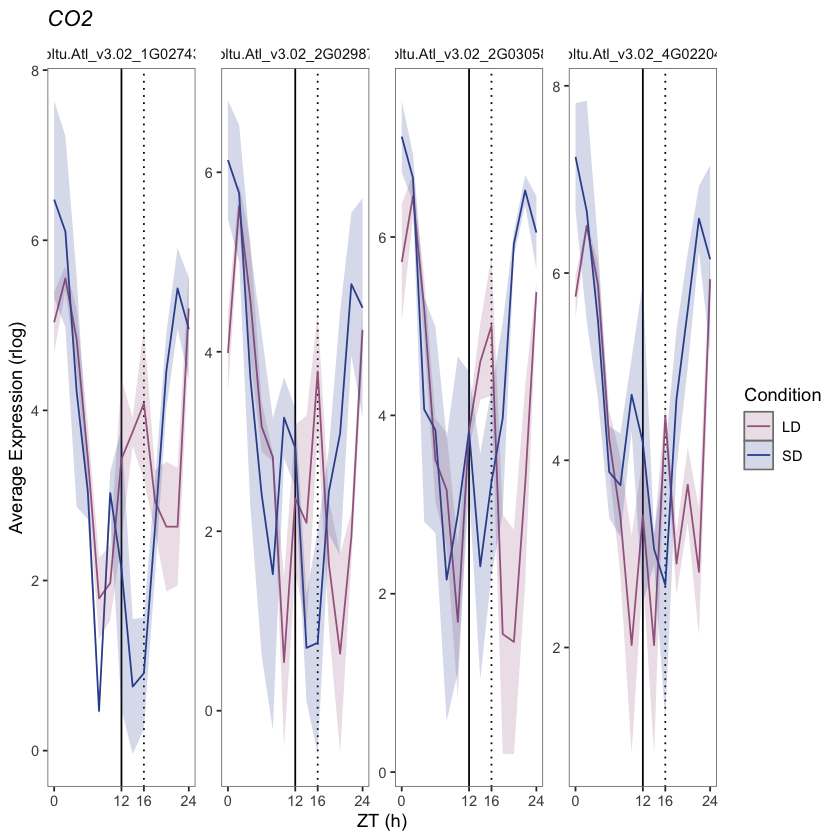

In [11]:
## Plot SD vs LD
CO2_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CO2'|Gene_Name == 'CO2b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO2')),4)
CO2_rlog_ribbonPlot 

In [12]:
CO2_rlog_ribbonPlot %>% save_plot(file="./Results/CO2_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO2 in tubers

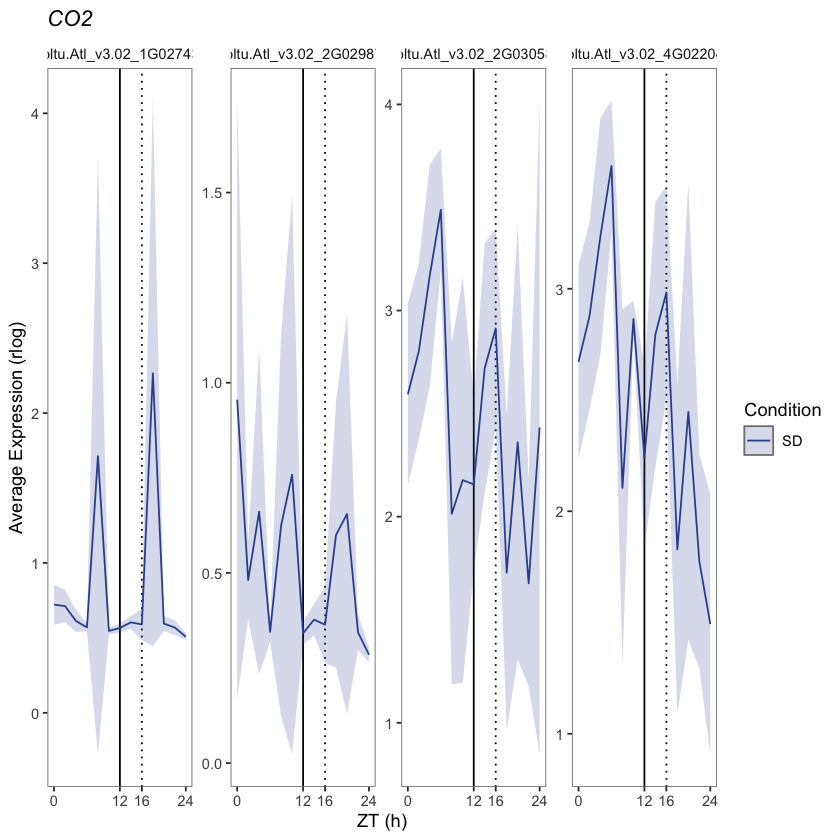

In [13]:
## Plot SD vs LD
CO2_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CO2'|Gene_Name == 'CO2b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO2')),4)
CO2_Tuber_rlog_ribbonPlot 
CO2_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/CO2_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO3

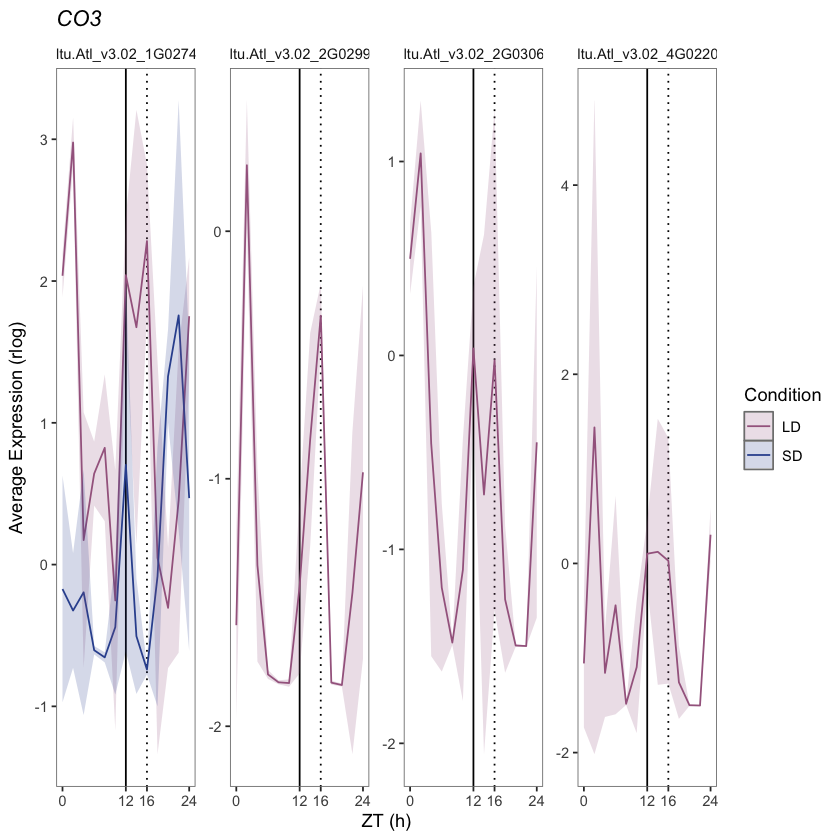

In [14]:
## Plot SD vs LD
CO3_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CO3'|Gene_Name == 'CO3b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                         SDLD_ribbon_plot_multiple(expression(italic('CO3')),4)
CO3_rlog_ribbonPlot 

CO3_rlog_ribbonPlot %>% save_plot(file="./Results/CO3_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO3 in tubers

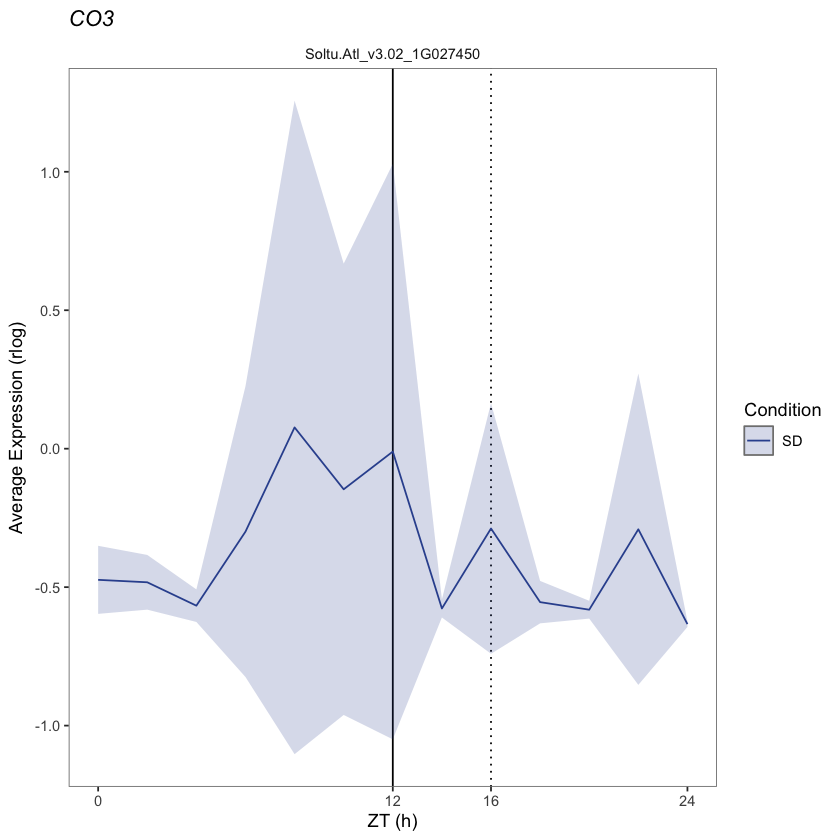

In [15]:
## Plot SD vs LD
CO3_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CO3'|Gene_Name == 'CO3b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO3')),4)
CO3_Tuber_rlog_ribbonPlot 

CO3_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/CO3_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 1.5)

## SP5G

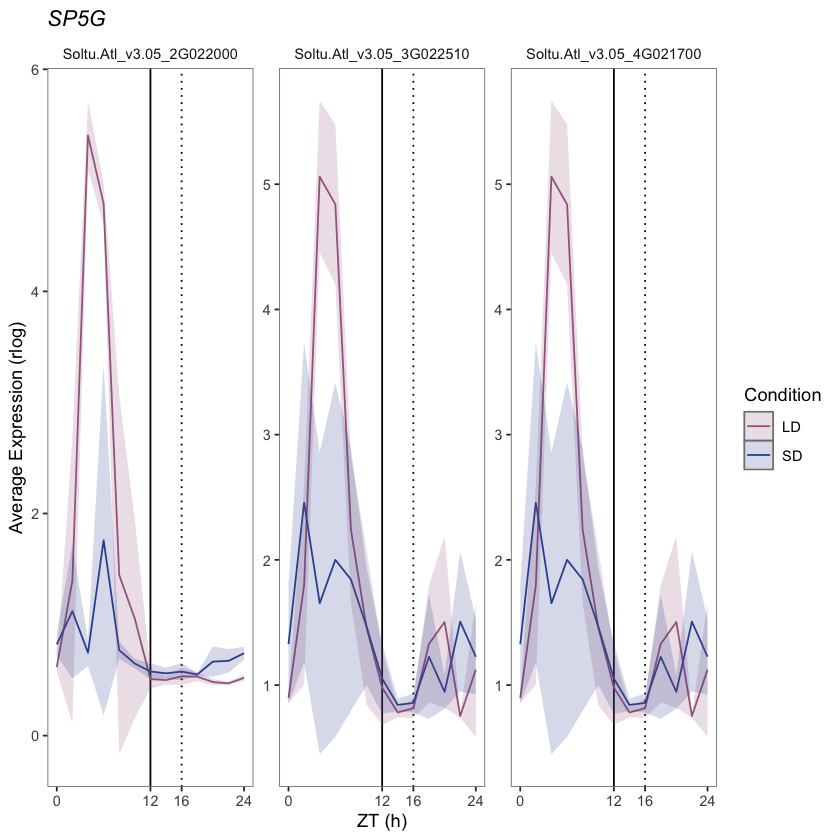

In [16]:
## Plot SD vs LD
SP5G_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'SP5G') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP5G')),4)
SP5G_rlog_ribbonPlot 

SP5G_rlog_ribbonPlot %>% save_plot(file="./Results/SP5G_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 3)

## SP5G in tubers

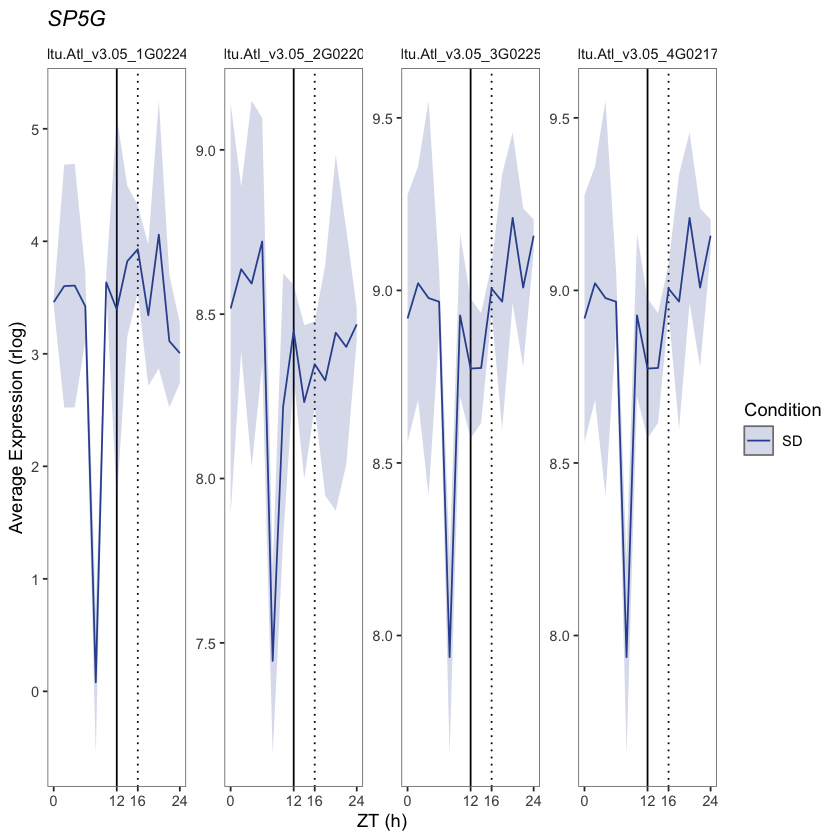

In [17]:
## Plot SD vs LD
SP5G_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'SP5G') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP5G')),4)
SP5G_Tuber_rlog_ribbonPlot 

SP5G_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/SP5G_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## SP6A

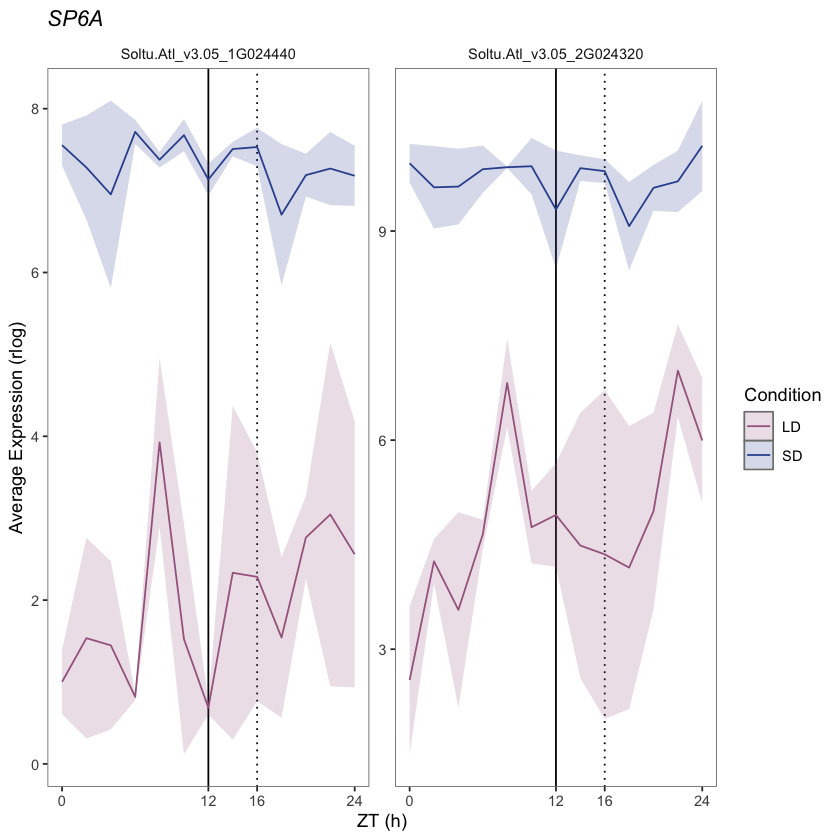

In [18]:
## Plot SD vs LD
SP6A_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'SP6A') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP6A')),4)
SP6A_rlog_ribbonPlot 

SP6A_rlog_ribbonPlot %>% save_plot(file="./Results/SP6A_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 2.25)

## SP6A in tuber

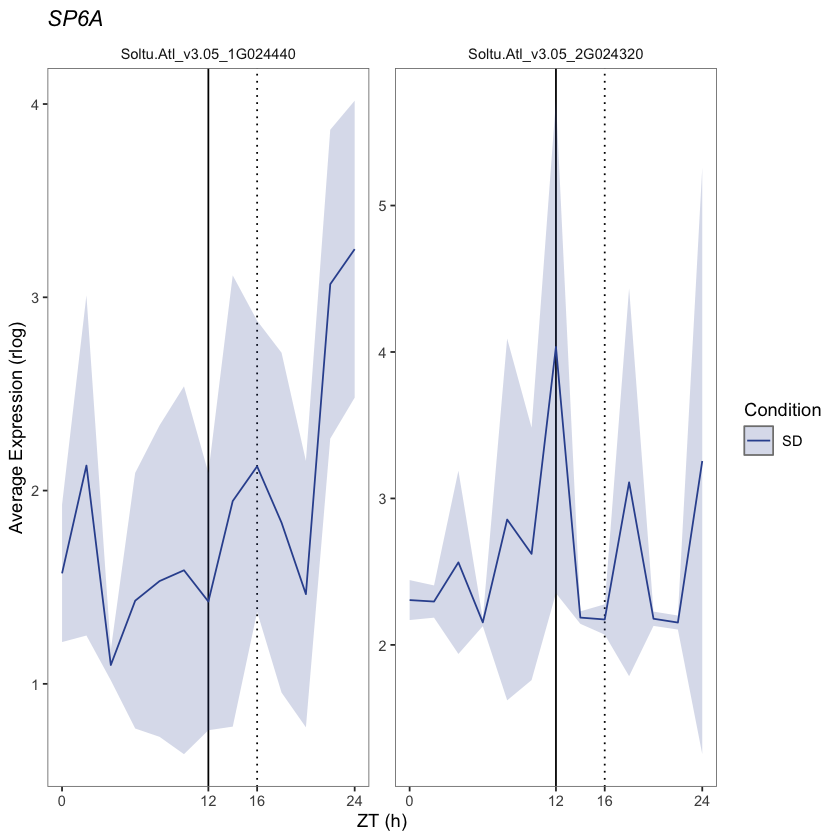

In [19]:
## Plot SD vs LD
SP6A_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'SP6A') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP6A')),4)
SP6A_Tuber_rlog_ribbonPlot 

SP6A_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/SP6A_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 2.25)

## CDF1

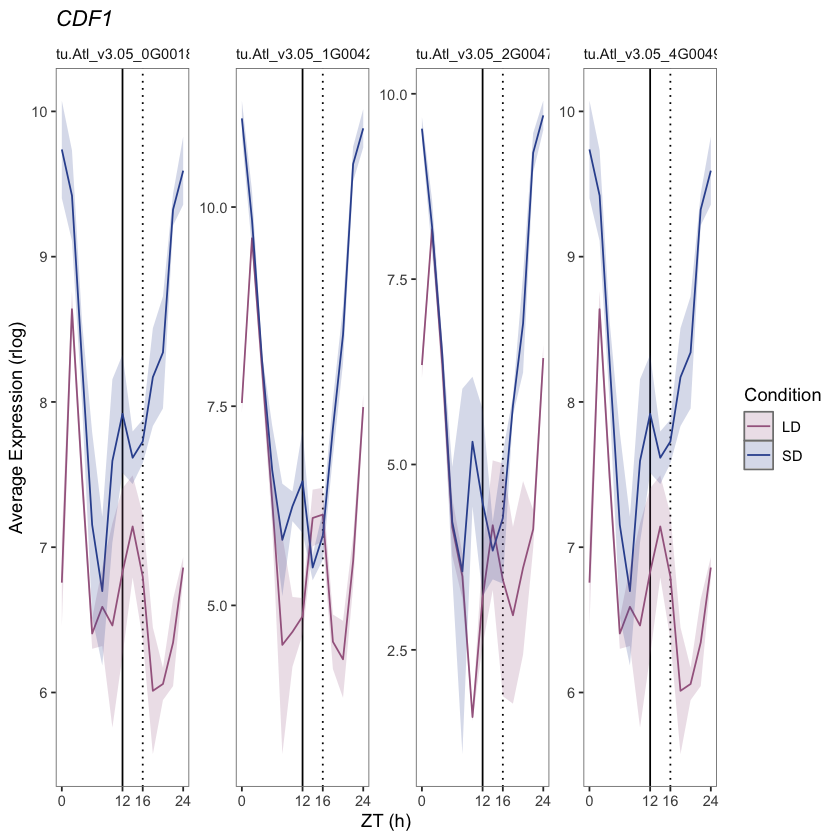

In [20]:
## Plot SD vs LD
CDF1_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'CDF1') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CDF1')),4)
CDF1_rlog_ribbonPlot 

CDF1_rlog_ribbonPlot %>% save_plot(file="./Results/CDF1_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## BEL5

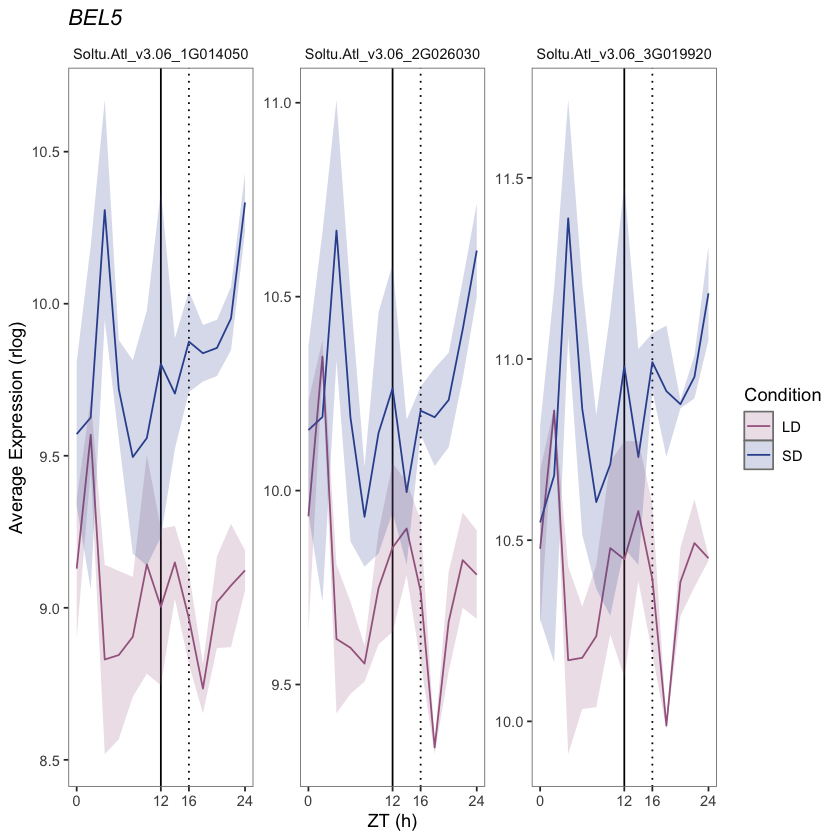

In [21]:
## Plot SD vs LD
BEL5_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'BEL5') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('BEL5')),4)
BEL5_rlog_ribbonPlot 

BEL5_rlog_ribbonPlot %>% save_plot(file="./Results/BEL5_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 3.2)

## BEL5 in tuber

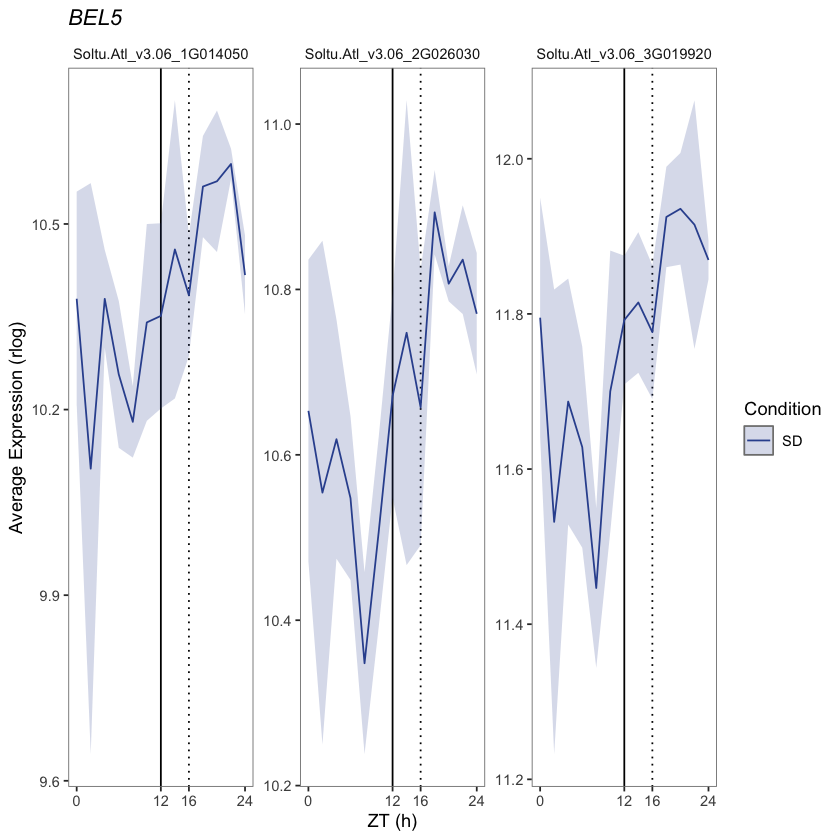

In [22]:
## Plot SD vs LD
BEL5_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Gene_Name == 'BEL5') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% 
                        SDLD_ribbon_plot_multiple(expression(italic('BEL5')),4)
BEL5_Tuber_rlog_ribbonPlot 

BEL5_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/BEL5_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 3.2)

## Plot CG leaves and tubers

In [23]:
MyGenes <-c('LHY','LUX_BOAb', 'RVE3_5', 'RVE4_8', 'RVE1a', 'PRR5', 'PRR3a', 'PRR3b')


In [24]:
CG_ex %>% filter( Gene_Name %in% MyGenes) %>% filter(Tissue == 'Leaf') %>%
                   head()

,geneID,ZT,Tissue,Condition,mean_expression,std,cv,Average,SD,CV,target_id,Group,Gene_Name,Genome,Gene,Gene_manual
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Soltu.Atl_v3.01_1G022500.4,0,Leaf,LD,9.901436,0.12069335,0.012189479,9.492135,0.4748214,0.01095778,Soltu.Atl_v3.01_1G022500,Clock,RVE3_5,ATL_H1,Synt_2387,Synt_2387
2,Soltu.Atl_v3.01_1G022500.4,0,Leaf,SD,10.065620,0.04607666,0.004577627,9.647102,0.5074466,0.01769217,Soltu.Atl_v3.01_1G022500,Clock,RVE3_5,ATL_H1,Synt_2387,Synt_2387
3,Soltu.Atl_v3.01_1G022500.4,2,Leaf,LD,10.728726,0.13139183,0.012246732,9.492135,0.4748214,0.01095778,Soltu.Atl_v3.01_1G022500,Clock,RVE3_5,ATL_H1,Synt_2387,Synt_2387
4,Soltu.Atl_v3.01_1G022500.4,2,Leaf,SD,10.450439,0.06911420,0.006613521,9.647102,0.5074466,0.01769217,Soltu.Atl_v3.01_1G022500,Clock,RVE3_5,ATL_H1,Synt_2387,Synt_2387
5,Soltu.Atl_v3.01_1G022500.4,4,Leaf,LD,9.824941,0.16657272,0.016954068,9.492135,0.4748214,0.01095778,Soltu.Atl_v3.01_1G022500,Clock,RVE3_5,ATL_H1,Synt_2387,Synt_2387
6,Soltu.Atl_v3.01_1G022500.4,4,Leaf,SD,9.782868,0.19952941,0.020395799,9.647102,0.5074466,0.01769217,Soltu.Atl_v3.01_1G022500,Clock,RVE3_5,ATL_H1,Synt_2387,Synt_2387


LHY   LUX_BOAb      PRR3a      PRR3b      PRR5a      RVE1a     RVE3_5 
     "LHY" "LUX-BOAb"    "PRR3a"    "PRR3b"    "PRR5a"    "RVE1a"   "RVE3/5" 
    RVE4_8 
  "RVE4/8"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


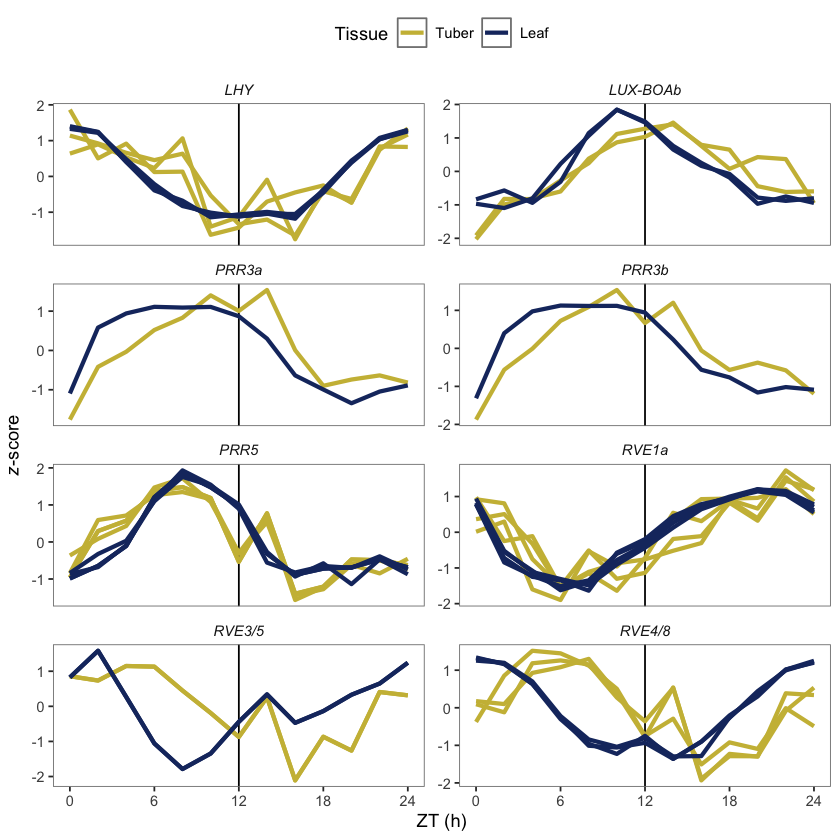

In [25]:



# New facet label names for supp variable

MyGene_Labels <- c('LHY', 'LUX-BOAb', 'PRR3a', 'PRR3b', 'PRR5a', 'RVE1a', 'RVE3/5', 'RVE4/8')
names(MyGene_Labels) <-c('LHY', 'LUX_BOAb', 'PRR3a', 'PRR3b', 'PRR5a', 'RVE1a', 'RVE3_5', 'RVE4_8')


MyGene_Labels

CG_LT_plot_z<- CG_ex %>% filter( Gene_Name %in% MyGenes) %>% filter(Condition == 'SD') %>%
                  #  head()
                SD_z_genes_multiple_LT (.,MyGene_Labels, 2)

CG_LT_plot_z

In [26]:
CG_LT_plot_z %>% ggsave(file="./Results/CG_z_score_multiple.pdf", width=4, height=7, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


# Plotting all clock associated genes

In [27]:


AllCG_Labels <- c('LHY', 'LKP2-homolog', 'LUX-BOAb','LUX-BOAa', 'PRR3a', 'PRR3b', 'PRR5a', 'RVE1a', 'RVE3/5', 'RVE4/8', 'ZTL/LKP2', 'ELF4a-chr7')
names(AllCG_Labels) <-c('LHY','LKP2_homolog', 'LUX_BOAb','LUX_BOAa', 'PRR3a', 'PRR3b', 'PRR5a', 'RVE1a', 'RVE3_5', 'RVE4_8', 'ZTL_LKP2', 'ELF4a_chr7')





Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


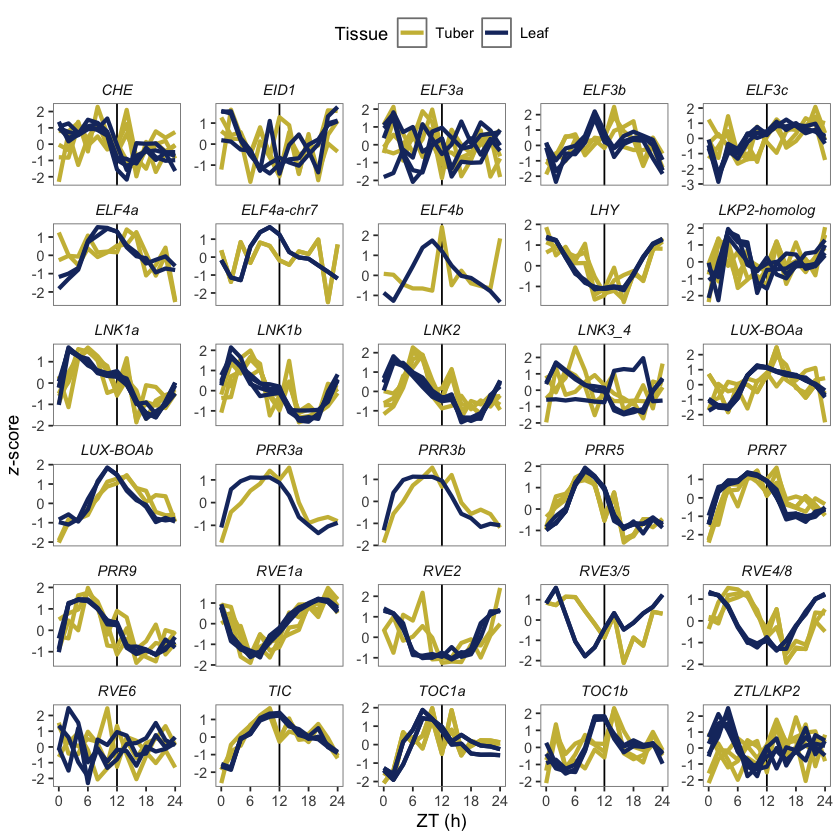

In [28]:
CG_All_LT_plot_z<- CG_ex %>% filter( Group== 'Clock') %>% filter(Condition == 'SD') %>%
                  #  head()
                SD_z_genes_multiple_LT (., AllCG_Labels, 5)

CG_All_LT_plot_z

In [29]:
CG_All_LT_plot_z %>% ggsave(file="./Results/CG_all_z_score_LT.pdf", width=9, height=10.5, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
